# 1. Análise de ativos

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.graph_objects as go

In [ ]:
data_inicio = pd.to_datetime('2019-01-01')
data_fim = pd.to_datetime('2023-01-01')

In [ ]:
data_inicio

Timestamp('2019-01-01 00:00:00')

In [ ]:
bbdc4 = yf.download('BBDC4.SA', start=data_inicio, end=data_fim)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
bbdc4

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,24.198597,25.538443,24.054596,25.288004,20.363150,37247502
2019-01-03,25.231655,25.601051,24.943651,25.532181,20.569431,31131823
2019-01-04,25.325569,25.838968,25.043825,25.331829,20.408030,23808981
2019-01-07,25.262960,25.851490,25.262960,25.632357,20.650146,30560665
2019-01-08,25.701227,25.795141,25.037565,25.788879,20.776236,33927722
...,...,...,...,...,...,...
2022-12-23,14.950000,15.280000,14.910000,15.140000,14.173717,21104200
2022-12-26,15.090000,15.130000,14.740000,14.780000,13.836692,13937200
2022-12-27,14.940000,14.980000,14.560000,14.710000,13.771160,78235200


In [ ]:
type(bbdc4)

pandas.core.frame.DataFrame

In [ ]:
bbdc4.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-26', '2022-12-27',
               '2022-12-28', '2022-12-29'],
              dtype='datetime64[ns]', name='Date', length=993, freq=None)

In [ ]:
fig = go.Figure() #cria uma figura em branco
fig.add_trace(go.Scatter(name='BBDC4', x=bbdc4.index, y=bbdc4['Adj Close'])) #adicionando o gráfico de linhas na figura
fig.update_layout(title_text='Cotação BBDC4', template='simple_white') #estou mexendo no layout do gráfico
fig.show() #para mostrar o gráfico

In [ ]:
bbdc4['Adj Close']

Date
2019-01-02    20.363150
2019-01-03    20.569431
2019-01-04    20.408030
2019-01-07    20.650146
2019-01-08    20.776236
                ...    
2022-12-23    14.173717
2022-12-26    13.836692
2022-12-27    13.771160
2022-12-28    14.192437
2022-12-29    14.183078
Name: Adj Close, Length: 993, dtype: float64

In [ ]:
bbdc4_retornos = bbdc4['Adj Close'].pct_change()
bbdc4_retornos

Date
2019-01-02         NaN
2019-01-03    0.010130
2019-01-04   -0.007847
2019-01-07    0.011864
2019-01-08    0.006106
                ...   
2022-12-23    0.017473
2022-12-26   -0.023778
2022-12-27   -0.004736
2022-12-28    0.030591
2022-12-29   -0.000659
Name: Adj Close, Length: 993, dtype: float64

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='BRADESCO_RETORNOS', x=bbdc4_retornos.index, y=bbdc4_retornos.values))
fig.update_layout(title_text='Bradesco Retornos', template='plotly_dark')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(name='BRADESCO_RETORNOS', x=bbdc4_retornos.values))
fig.update_layout(title_text='Bradesco Retornos', template='plotly_dark')
fig.show()

In [ ]:
#média dos retornos

bbdc4_retornos.mean()

-6.45507034955534e-05

In [ ]:
#mediana
bbdc4_retornos.median()

-0.000567792466314887

In [ ]:
#Describe
bbdc4_retornos.describe()

count    992.000000
mean      -0.000065
std        0.024434
min       -0.173843
25%       -0.011967
50%       -0.000568
75%        0.012388
max        0.168669
Name: Adj Close, dtype: float64

## Função Rolling

In [ ]:
mm_20 = bbdc4['Close'].rolling(20).mean()
mm_20

Date
2019-01-02        NaN
2019-01-03        NaN
2019-01-04        NaN
2019-01-07        NaN
2019-01-08        NaN
               ...   
2022-12-23    14.7130
2022-12-26    14.6855
2022-12-27    14.6455
2022-12-28    14.6245
2022-12-29    14.6120
Name: Close, Length: 993, dtype: float64

In [ ]:
fig = go.Figure() #cria uma figura em branco
fig.add_trace(go.Scatter(name='BBDC4', x=bbdc4.index, y=bbdc4['Close'])) #adicionando o gráfico de linhas na figura
fig.add_trace(go.Scatter(name='MM20', x=mm_20.index, y=mm_20.values))
fig.update_layout(title_text='MM20 vs Cotação BBDC4', template='simple_white') #estou mexendo no layout do gráfico
fig.show() #para mostrar o gráfico

In [ ]:
#Janela de volatilidade

vol_20 = bbdc4_retornos.rolling(20).std()
vol_20

Date
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
                ...   
2022-12-23    0.019871
2022-12-26    0.020547
2022-12-27    0.020314
2022-12-28    0.021578
2022-12-29    0.021437
Name: Adj Close, Length: 993, dtype: float64

In [ ]:
fig = go.Figure() #cria uma figura em branco
fig.add_trace(go.Scatter(name='Janela Volatilidade', x=vol_20.index, y=vol_20.values)) #adicionando o gráfico de linhas na figura
fig.update_layout(title_text='Janela de Volatilidade (20) BBDC4', template='simple_white') #estou mexendo no layout do gráfico
fig.show() #para mostrar o gráfico

## Montando um portfólio

In [ ]:
ativos = ['ABEV3.SA', 'BBDC4.SA', 'PETR4.SA', 'VALE3.SA'] #string

pesos = np.array([0.25, 0.25, 0.25, 0.25]) #float

n = 100 #integer

In [ ]:
carteira = yf.download(ativos, start=data_inicio, end=data_fim)['Adj Close']
carteira

[*********************100%%**********************]  4 of 4 completed


,ABEV3.SA,BBDC4.SA,PETR4.SA,VALE3.SA
Date,,,,
2019-01-02,13.950425,20.363152,8.899590,35.196037
2019-01-03,14.105910,20.569439,9.117826,33.756233
2019-01-04,14.295948,20.408022,9.143719,35.953831
2019-01-07,14.235481,20.650137,9.287975,35.760941
2019-01-08,13.950425,20.776230,9.232491,36.105392
...,...,...,...,...
2022-12-23,14.620000,14.173717,20.212732,81.991486
2022-12-26,14.520000,13.836691,20.067896,82.741875
2022-12-27,14.520000,13.771160,20.204685,84.717575


In [ ]:
retornos = carteira.pct_change()
retornos

,ABEV3.SA,BBDC4.SA,PETR4.SA,VALE3.SA
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,0.011146,0.010130,0.024522,-0.040908
2019-01-04,0.013472,-0.007847,0.002840,0.065102
2019-01-07,-0.004230,0.011864,0.015777,-0.005365
2019-01-08,-0.020024,0.006106,-0.005974,0.009632
...,...,...,...,...
2022-12-23,0.013870,0.017473,0.047103,0.006647
2022-12-26,-0.006840,-0.023778,-0.007166,0.009152
2022-12-27,0.000000,-0.004736,0.006816,0.023878


In [ ]:
retornos.dropna()

,ABEV3.SA,BBDC4.SA,PETR4.SA,VALE3.SA
Date,,,,
2019-01-03,0.011146,0.010130,0.024522,-0.040908
2019-01-04,0.013472,-0.007847,0.002840,0.065102
2019-01-07,-0.004230,0.011864,0.015777,-0.005365
2019-01-08,-0.020024,0.006106,-0.005974,0.009632
2019-01-09,0.014242,0.017237,0.020834,0.024423
...,...,...,...,...
2022-12-23,0.013870,0.017473,0.047103,0.006647
2022-12-26,-0.006840,-0.023778,-0.007166,0.009152
2022-12-27,0.000000,-0.004736,0.006816,0.023878


In [ ]:
retornos

,ABEV3.SA,BBDC4.SA,PETR4.SA,VALE3.SA
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,0.011146,0.010130,0.024522,-0.040908
2019-01-04,0.013472,-0.007847,0.002840,0.065102
2019-01-07,-0.004230,0.011864,0.015777,-0.005365
2019-01-08,-0.020024,0.006106,-0.005974,0.009632
...,...,...,...,...
2022-12-23,0.013870,0.017473,0.047103,0.006647
2022-12-26,-0.006840,-0.023778,-0.007166,0.009152
2022-12-27,0.000000,-0.004736,0.006816,0.023878


In [ ]:
retornos.dropna(inplace=True)

In [ ]:
retornos

,ABEV3.SA,BBDC4.SA,PETR4.SA,VALE3.SA
Date,,,,
2019-01-03,0.011146,0.010130,0.024522,-0.040908
2019-01-04,0.013472,-0.007847,0.002840,0.065102
2019-01-07,-0.004230,0.011864,0.015777,-0.005365
2019-01-08,-0.020024,0.006106,-0.005974,0.009632
2019-01-09,0.014242,0.017237,0.020834,0.024423
...,...,...,...,...
2022-12-23,0.013870,0.017473,0.047103,0.006647
2022-12-26,-0.006840,-0.023778,-0.007166,0.009152
2022-12-27,0.000000,-0.004736,0.006816,0.023878


In [ ]:
import seaborn as sns

corr = retornos.corr()

corr

,ABEV3.SA,BBDC4.SA,PETR4.SA,VALE3.SA
ABEV3.SA,1.000000,0.505545,0.407476,0.198763
BBDC4.SA,0.505545,1.000000,0.599685,0.400136
PETR4.SA,0.407476,0.599685,1.000000,0.492810
VALE3.SA,0.198763,0.400136,0.492810,1.000000


<Axes: >

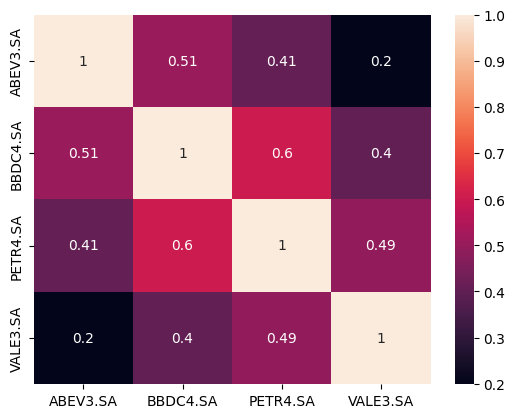

In [ ]:
sns.heatmap(corr, annot=True)

In [ ]:
#Retorno do portfolio Somatorio(wa * ra)...

retorno_carteira = (retornos * pesos).sum(axis=1)
retorno_carteira

Date
2019-01-03    0.001222
2019-01-04    0.018392
2019-01-07    0.004511
2019-01-08   -0.002565
2019-01-09    0.019184
                ...   
2022-12-23    0.021273
2022-12-26   -0.007158
2022-12-27    0.006490
2022-12-28    0.004517
2022-12-29   -0.004014
Length: 992, dtype: float64

In [ ]:
retorno_portfolio = pd.DataFrame()
retorno_portfolio['Retornos'] = retorno_carteira
retorno_portfolio

,Retornos
Date,
2019-01-03,0.001222
2019-01-04,0.018392
2019-01-07,0.004511
2019-01-08,-0.002565
2019-01-09,0.019184
...,...
2022-12-23,0.021273
2022-12-26,-0.007158
2022-12-27,0.006490


<Axes: xlabel='Date'>

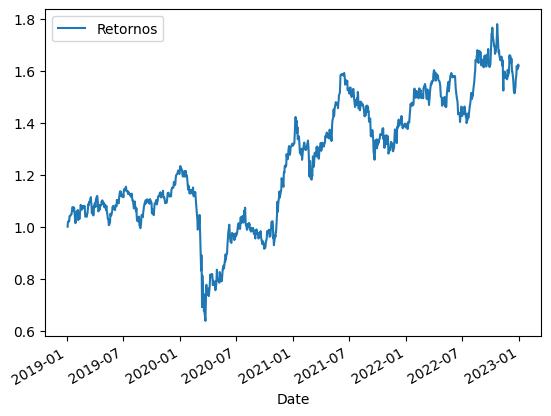

In [ ]:
retorno_acumulado = pd.DataFrame((1+retorno_portfolio).cumprod())
retorno_acumulado.plot()

In [ ]:
cov = retornos.cov()
cov

,ABEV3.SA,BBDC4.SA,PETR4.SA,VALE3.SA
ABEV3.SA,0.000431,0.000256,0.000253,0.000112
BBDC4.SA,0.000256,0.000597,0.000439,0.000264
PETR4.SA,0.000253,0.000439,0.000896,0.000399
VALE3.SA,0.000112,0.000264,0.000399,0.000732


In [ ]:
#Volatilidade da carteira

vol_carteira = np.sqrt(np.dot(pesos.T, np.dot(cov,pesos)))
vol_carteira

0.0195315547378357

In [ ]:
vol_ano = vol_carteira*np.sqrt(252)
vol_ano